In [247]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 

In [182]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image   
from PIL import Image, ImageFilter
from pathlib import Path


from tensorflow.keras.preprocessing.image import load_img


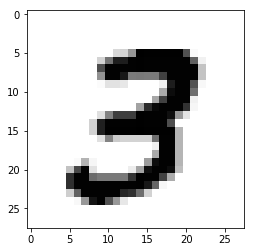

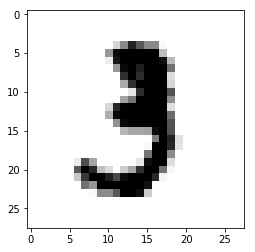

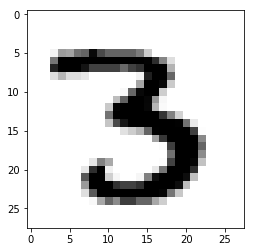

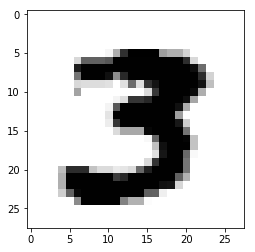

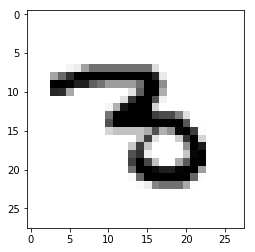

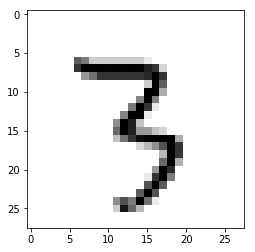

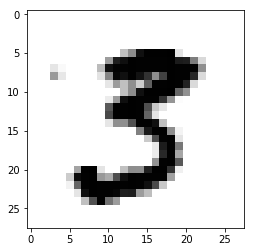

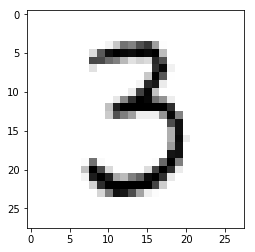

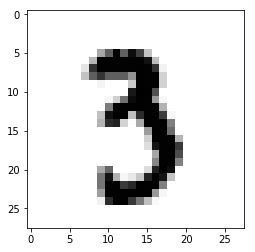

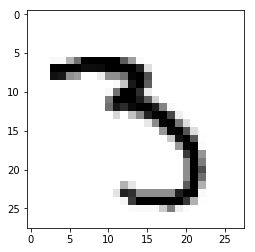

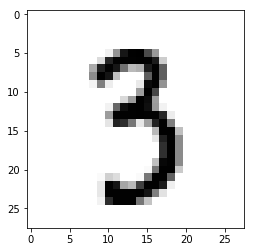

In [285]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#print(train_images.shape)
#print(train_images[0])
train_images_short = train_images[:100]
for i in range(0, 100):
    if train_labels[i] == 3:
        digit = train_images_short[i]
        plt.imshow(digit,cmap=plt.cm.binary)
        plt.show()

In [269]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#print(train_images[0])
#print(train_images.shape)

#print(train_images.dtype)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_labels)
test_labels = to_categorical(test_labels)

In [270]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [271]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [272]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2542 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1036 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0681 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0498 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0372 - acc: 0.9888


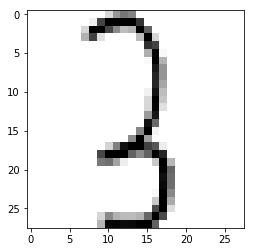

prediction=
[[2.2622776e-13 8.3876053e-09 5.3271776e-01 4.1971495e-07 3.5408614e-17
  2.4274937e-07 4.4355622e-01 2.3725212e-02 6.3330631e-08 4.4723909e-09]]


In [284]:
test_img= image.load_img('test/3.png')
test_img=test_img.convert('L')

#print(test_img)
test_img = np.array(test_img)
#print(test_img.dtype)
#print(test_img.shape)
#print(test_img)
digit = test_img
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
test_img = test_img.reshape((1, 28 * 28))
#print(test_img)
test_img = test_img.astype('float32') / 255
#print(test_img.dtype)
#print(test_img)


#prediction = network.evaluate(test_images, test_labels)
prediction=network.predict(test_img)
print("prediction=")
print(prediction)



In [281]:
print(np.argmax(prediction))

1
